In [35]:
import glob

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from tqdm import tqdm

tqdm.pandas()

In [36]:
mpl.rcParams['figure.dpi'] = 120

In [37]:
data_base_dir = "data/by_date"

dates = []
dfs = {}
for fpath in glob.glob(data_base_dir + "/*"):
    df = pd.read_csv(fpath)
    date = df["date"].iloc[0]
    dfs[date] = df  # [df["question"].notnull()]
    dates.append(date)

dates.sort()

In [38]:
df = pd.concat(dfs)
df

speaker  \
1984-10-07 0    Dorothy Ridings   
           1    Barbara Walters   
           2     James Wieghart   
           3     James Wieghart   
           4     James Wieghart   
...                         ...   
2004-09-30 137       Jim Lehrer   
           138       John Kerry   
           139       Jim Lehrer   
           140   George W. Bush   
           141       Jim Lehrer   

                                                             text  type  \
1984-10-07 0    Good evening from the Kentucky Center for the ...  Pres   
           1    Thank you, Dorothy. A few words as we begin to...  Pres   
           2    Mr. President, in 1980 you promised the Americ...  Pres   
           3    Mr. President, the Congressional Budget Office...  Pres   
           4    Mr. Mondale, the Carter- Mondale administratio...  Pres   
...                                                           ...   ...   
2004-09-30 137  All right, that brings us to closing statement...  Pres   
           138  Thank you, Jim, very much. Thank you very much...  Pres   
           139                        Mr. President, two minutes.  Pres   
           140  Thank you very much tonight, Jim. Senator. If ...  Pres   
           141  And that ends tonights debate. A reminder, the...  Pres   

                election_year        date  candidate  qud question  \
1984-10-07 0             1984  1984-10-07          0  NaN      NaN   
           1             1984  1984-10-07          0  NaN      NaN   
           2             1984  1984-10-07          0  NaN      NaN   
           3             1984  1984-10-07          0  NaN      NaN   
           4             1984  1984-10-07          0  NaN      NaN   
...                       ...         ...        ...  ...      ...   
2004-09-30 137           2004  2004-09-30          0  NaN      NaN   
           138           2004  2004-09-30          1  NaN      NaN   
           139           2004  2004-09-30          0  NaN      NaN   
           140           2004  2004-09-30          1  NaN      NaN   
           141           2004  2004-09-30          0  NaN      NaN   

                similarity_cls  similarity_max  similarity_mean  \
1984-10-07 0               NaN             NaN              NaN   
           1               NaN             NaN              NaN   
           2               NaN             NaN              NaN   
           3               NaN             NaN              NaN   
           4               NaN             NaN              NaN   
...                        ...             ...              ...   
2004-09-30 137             NaN             NaN              NaN   
           138             NaN             NaN              NaN   
           139             NaN             NaN              NaN   
           140             NaN             NaN              NaN   
           141             NaN             NaN              NaN   

                similarity_sbert       party question_clean  
1984-10-07 0                 NaN   Moderator            NaN  
           1                 NaN   Moderator            NaN  
           2                 NaN   Moderator            NaN  
           3                 NaN   Moderator            NaN  
           4                 NaN   Moderator            NaN  
...                          ...         ...            ...  
2004-09-30 137               NaN   Moderator            NaN  
           138               NaN  Democratic            NaN  
           139               NaN   Moderator            NaN  
           140               NaN  Republican            NaN  
           141               NaN   Moderator            NaN  

[2716 rows x 14 columns]

In [39]:
for i, d in enumerate(dates):
    print(f"{i}\t{d}\t{len(dfs[d])}\t{len(dfs[d].columns)}")

0	1960-09-26	68	14
1	1976-09-23	94	14
2	1980-09-21	76	14
3	1984-10-07	134	14
4	1988-09-25	161	14
5	1992-10-11	92	14
6	1996-10-06	144	14
7	2000-10-03	166	14
8	2004-09-30	142	14
9	2008-09-26	189	14
10	2012-10-03	210	14
11	2016-09-26	308	14
12	2020-09-29	932	14


In [40]:
for i, d in enumerate(dates):
    df_f = dfs[d][dfs[d]["question"].notnull()]
    print(f"{i}\t{d}\t{len(df_f)}\t{len(df_f.columns)}")

0	1960-09-26	10	14
1	1976-09-23	20	14
2	1980-09-21	12	14
3	1984-10-07	30	14
4	1988-09-25	23	14
5	1992-10-11	11	14
6	1996-10-06	21	14
7	2000-10-03	26	14
8	2004-09-30	18	14
9	2008-09-26	17	14
10	2012-10-03	25	14
11	2016-09-26	19	14
12	2020-09-29	39	14


In [51]:
debate_lenghts = df.groupby("date").size()
debate_lenghts_f = df[df["question"].notnull()].groupby("date").size()
debate_ratios = debate_lenghts_f / debate_lenghts
debate_lenghts, debate_lenghts_f, debate_ratios

(date
 1960-09-26     68
 1976-09-23     94
 1980-09-21     76
 1984-10-07    134
 1988-09-25    161
 1992-10-11     92
 1996-10-06    144
 2000-10-03    166
 2004-09-30    142
 2008-09-26    189
 2012-10-03    210
 2016-09-26    308
 2020-09-29    932
 dtype: int64,
 date
 1960-09-26    10
 1976-09-23    20
 1980-09-21    12
 1984-10-07    30
 1988-09-25    23
 1992-10-11    11
 1996-10-06    21
 2000-10-03    26
 2004-09-30    18
 2008-09-26    17
 2012-10-03    25
 2016-09-26    19
 2020-09-29    39
 dtype: int64,
 date
 1960-09-26    0.147059
 1976-09-23    0.212766
 1980-09-21    0.157895
 1984-10-07    0.223881
 1988-09-25    0.142857
 1992-10-11    0.119565
 1996-10-06    0.145833
 2000-10-03    0.156627
 2004-09-30    0.126761
 2008-09-26    0.089947
 2012-10-03    0.119048
 2016-09-26    0.061688
 2020-09-29    0.041845
 dtype: float64)

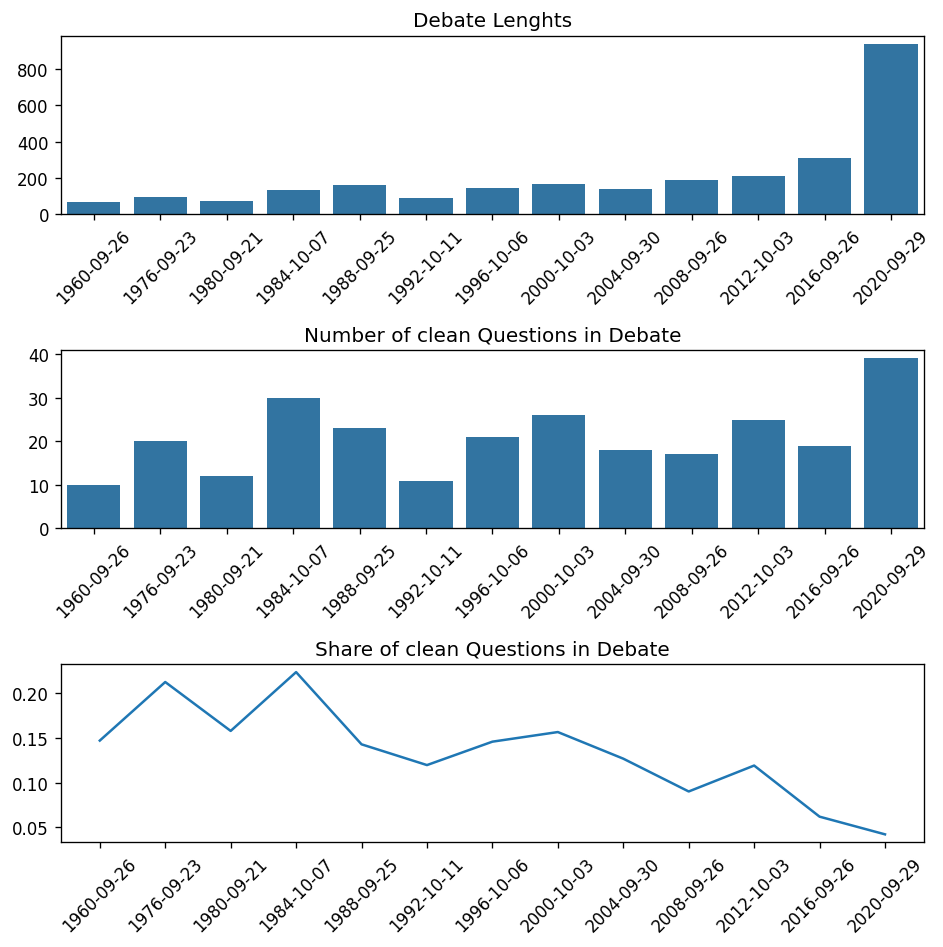

In [72]:
fig, axs = plt.subplots(3, 1, figsize=(8, 8))

sns.barplot(data=debate_lenghts, ax=axs[0]).set_title("Debate Lenghts")
axs[0].set_xlabel(None)
sns.barplot(data=debate_lenghts_f, ax=axs[1]).set_title("Number of clean Questions in Debate")
axs[1].set_xlabel(None)
sns.lineplot(data=debate_ratios, ax=axs[2]).set_title("Share of clean Questions in Debate")
axs[2].set_xlabel(None)

for ax in axs:
    ax.tick_params(axis='x', rotation=45)
    
fig.tight_layout()

In [42]:
df_melted = pd.melt(
    df,
    id_vars=[
        col
        for col in df.columns
        if col
        not in [
            "similarity_cls",
            "similarity_mean",
            "similarity_max",
            "similarity_sbert",
        ]
    ],
    var_name="measure",
    value_name="similarity",
)
df_melted

,speaker,text,type,election_year,date,candidate,qud,question,party,question_clean,measure,similarity
0,Dorothy Ridings,Good evening from the Kentucky Center for the ...,Pres,1984,1984-10-07,0,NaN,NaN,Moderator,NaN,similarity_cls,NaN
1,Barbara Walters,"Thank you, Dorothy. A few words as we begin to...",Pres,1984,1984-10-07,0,NaN,NaN,Moderator,NaN,similarity_cls,NaN
2,James Wieghart,"Mr. President, in 1980 you promised the Americ...",Pres,1984,1984-10-07,0,NaN,NaN,Moderator,NaN,similarity_cls,NaN
3,James Wieghart,"Mr. President, the Congressional Budget Office...",Pres,1984,1984-10-07,0,NaN,NaN,Moderator,NaN,similarity_cls,NaN
4,James Wieghart,"Mr. Mondale, the Carter- Mondale administratio...",Pres,1984,1984-10-07,0,NaN,NaN,Moderator,NaN,similarity_cls,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10859,Jim Lehrer,"All right, that brings us to closing statement...",Pres,2004,2004-09-30,0,NaN,NaN,Moderator,NaN,similarity_sbert,NaN
10860,John Kerry,"Thank you, Jim, very much. Thank you very much...",Pres,2004,2004-09-30,1,NaN,NaN,Democratic,NaN,similarity_sbert,NaN
10861,Jim Lehrer,"Mr. President, two minutes.",Pres,2004,2004-09-30,0,NaN,NaN,Moderator,NaN,similarity_sbert,NaN
10862,George W. Bush,"Thank you very much tonight, Jim. Senator. If ...",Pres,2004,2004-09-30,1,NaN,NaN,Republican,NaN,similarity_sbert,NaN


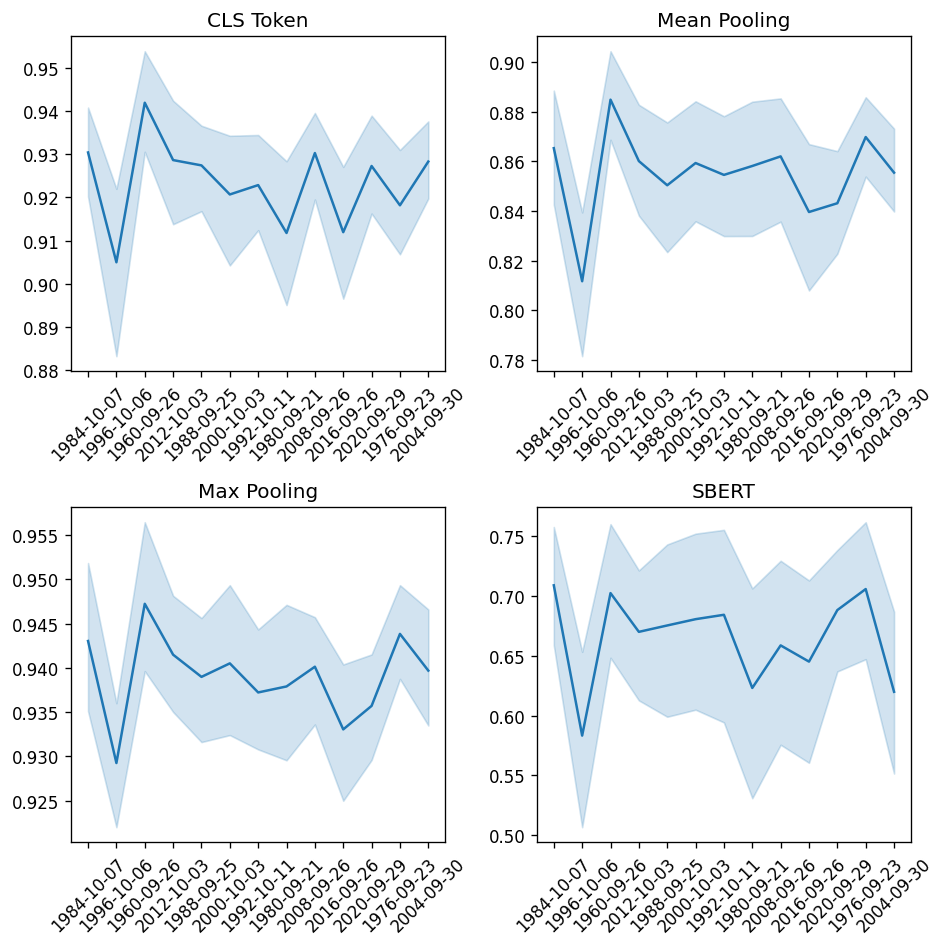

In [71]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

sns.lineplot(data=df, x="date", y="similarity_cls", ax=axs[0, 0]).set_title("CLS Token")
axs[0, 0].set_xlabel(None)
axs[0, 0].set_ylabel(None)
sns.lineplot(data=df, x="date", y="similarity_mean", ax=axs[0, 1]).set_title("Mean Pooling")
axs[0, 1].set_xlabel(None)
axs[0, 1].set_ylabel(None)
sns.lineplot(data=df, x="date", y="similarity_max", ax=axs[1, 0]).set_title("Max Pooling")
axs[1, 0].set_xlabel(None)
axs[1, 0].set_ylabel(None)
sns.lineplot(data=df, x="date", y="similarity_sbert", ax=axs[1, 1]).set_title("SBERT")
axs[1, 1].set_xlabel(None)
axs[1, 1].set_ylabel(None)

for ax in axs:
    for a in ax:
        a.tick_params(axis='x', rotation=45)

# fig.suptitle('Embedding Similarity') 
fig.tight_layout()

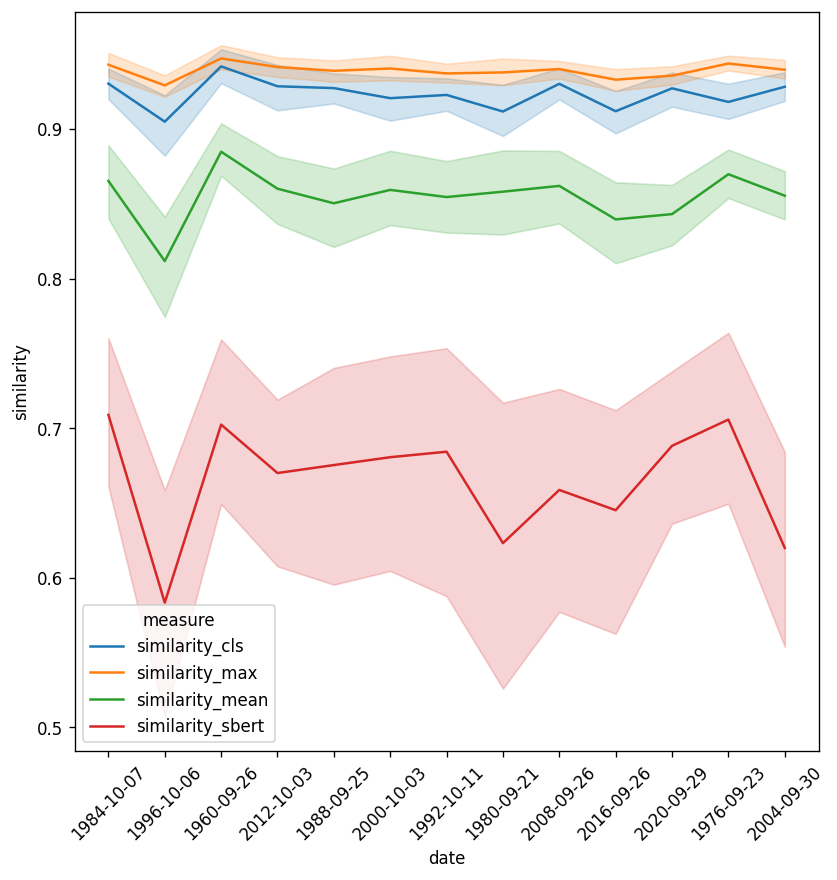

In [44]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.lineplot(data=df_melted, x="date", y="similarity", hue="measure", ax=ax)
ax.tick_params(axis='x', rotation=45)

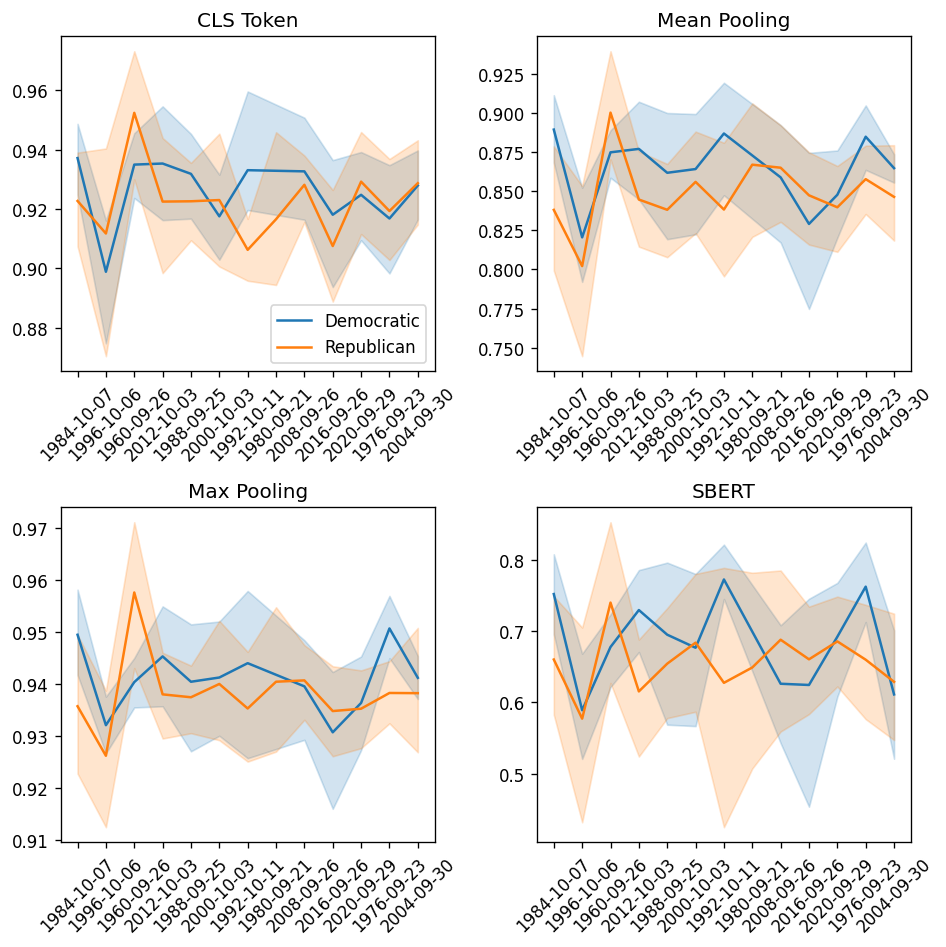

In [84]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

sns.lineplot(data=df[df["party"].isin(["Democratic", "Republican"])], x="date", y="similarity_cls", hue="party", ax=axs[0, 0]).set_title("CLS Token")
axs[0, 0].set_xlabel(None)
axs[0, 0].set_ylabel(None)
axs[0, 0].legend(loc='lower right')
sns.lineplot(data=df[df["party"].isin(["Democratic", "Republican"])], x="date", y="similarity_mean", hue="party", ax=axs[0, 1], legend=False).set_title("Mean Pooling")
axs[0, 1].set_xlabel(None)
axs[0, 1].set_ylabel(None)
sns.lineplot(data=df[df["party"].isin(["Democratic", "Republican"])], x="date", y="similarity_max", hue="party", ax=axs[1, 0], legend=False).set_title("Max Pooling")
axs[1, 0].set_xlabel(None)
axs[1, 0].set_ylabel(None)
sns.lineplot(data=df[df["party"].isin(["Democratic", "Republican"])], x="date", y="similarity_sbert", hue="party", ax=axs[1, 1], legend=False).set_title("SBERT")
axs[1, 1].set_xlabel(None)
axs[1, 1].set_ylabel(None)

for ax in axs:
    for a in ax:
        a.tick_params(axis='x', rotation=45)

fig.tight_layout()